In [2]:
## Boiler plate code common to many notebooks.  See the TestFilesCommonCode.ipynb for details
from __future__ import print_function
%run TestFilesCommonCode.ipynb

SimpleITK Version: 0.9.1
Compiled: Sep 28 2015 10:07:41



In [3]:
import numpy as np
import pandas as pd
from ggplot import *

In [9]:
### TEST
x=[0.125, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.425]
y=[0.125, 0.2, 0.1, 0.25, 0.15, 0.3, 0.2, 0.275]

#x = [0.1, 0.15, 0.125, 0.1]
#y = [0.1, 0.1, 0.15, 0.6]

#x = [0.1, 0.15, 0.15, 0.2, 0.25, 0.1]
#y = [0.1, 0.1, 0.15, 0.2, 0.25, 0.4]

#a = 0.05
#x = [a, a, 3*a, 3*a]
#y = [a, 3*a, a, 3*a]

#x=[0.1,0.1,0.1,0.1]
#y=[0.1,0.12,0.15,0.8]

print(x, y)
xy = np.transpose([x, y])
xy

[0.125, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.425] [0.125, 0.2, 0.1, 0.25, 0.15, 0.3, 0.2, 0.275]


array([[ 0.125,  0.125],
       [ 0.15 ,  0.2  ],
       [ 0.2  ,  0.1  ],
       [ 0.25 ,  0.25 ],
       [ 0.3  ,  0.15 ],
       [ 0.35 ,  0.3  ],
       [ 0.4  ,  0.2  ],
       [ 0.425,  0.275]])

In [10]:
DF_xy = pd.DataFrame(xy)
DF_xy.rename(columns = lambda x: str(x), inplace=True)
DF_xy.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_xy.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
DF_xy

,X,Y
0,0.125,0.125
1,0.150,0.200
2,0.200,0.100
3,0.250,0.250
4,0.300,0.150
5,0.350,0.300
6,0.400,0.200
7,0.425,0.275


In [11]:
xy_mean = np.array([np.mean(x), np.mean(y)])
xy_mean.shape = [1,2]
xy_mean

array([[ 0.275,  0.2  ]])

In [12]:
DF_xy_mean = pd.DataFrame(xy_mean)
DF_xy_mean.rename(columns = lambda x: str(x), inplace=True)
DF_xy_mean.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_xy_mean.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
DF_xy_mean

,X,Y
0,0.275,0.2


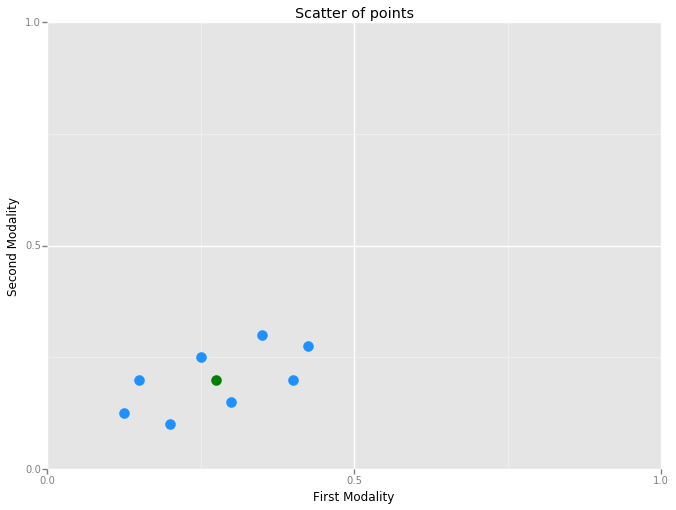

<ggplot: (318693521)>

In [13]:
ggplot(DF_xy, aes(x = 'X', y ='Y')) + \
    geom_point(alpha=1, size=100, color='dodgerblue') + \
    labs(x='First Modality', y='Second Modality', title='Scatter of points') + \
    geom_point(data = DF_xy_mean ,alpha=1, size = 100, color='green') + \
    xlim(0,1) + \
    ylim(0,1)

In [14]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    #print(covariance_xy) # <---
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    #print(inv_covariance_xy) # <---
    xy_mean = np.mean(x),np.mean(y)
    #print(xy_mean) # <---
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    
    md = []
    for i in range(len(diff_xy)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
    return md

In [15]:
MahalanobisDist(x,y)

[1.3612278194595455,
 1.4107430944120809,
 1.4107430944120805,
 1.0801234497346432,
 1.0801234497346432,
 1.4107430944120802,
 1.4107430944120807,
 1.3612278194595451]

In [16]:
def RemoveOutliers(x, y):
    MD = MahalanobisDist(x, y)
    Dist = MD
    threshold = np.mean(Dist) * 1.5 # adjust 1.5 accordingly
    #threshold = 0.2
    print(threshold)
    nx, ny = [], []
    outliers = np.array([])
    for i in range(len(MD)):
        if Dist[i] >= threshold:
            nx.append(x[i])
            ny.append(y[i])
    outliers = np.transpose([nx, ny]) # position of removed pair
    return outliers

In [17]:
#print('x:', x)
#print('y:', y)
out_arr = RemoveOutliers(x,y)
print(out_arr)

1.97356404676
[]


In [18]:
DF_out = pd.DataFrame(out_arr)
DF_out.rename(columns = lambda x: str(x), inplace=True)
DF_out.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_out.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
DF_out

,X,Y


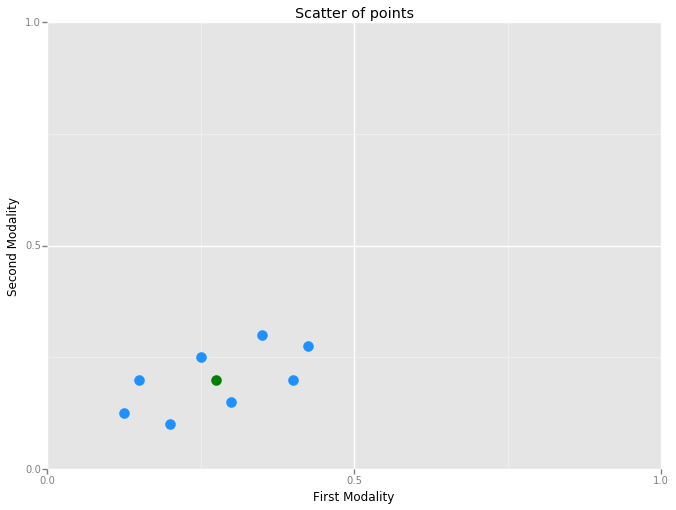

<ggplot: (320057569)>

In [19]:
ggplot(DF_xy, aes(x = 'X', y ='Y')) + \
    labs(x='First Modality', y='Second Modality', title='Scatter of points') + \
    geom_point(alpha=1, size=100, color='dodgerblue') + \
    geom_point(data = DF_out, alpha=1, size = 100, color='red') + \
    geom_point(data = DF_xy_mean ,alpha=1, size = 100, color='green')+ \
    xlim(0,1) + \
    ylim(0,1)

In [20]:
covariance_xy = np.cov(x,y, rowvar=0)
print(covariance_xy)
print(np.linalg.det(covariance_xy))

[[ 0.01267857  0.005     ]
 [ 0.005       0.00517857]]
4.06568877551e-05
